**Digit Recognition Using CNN Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


Number of samples in the training set: 60000
Number of samples in the testing set: 10000



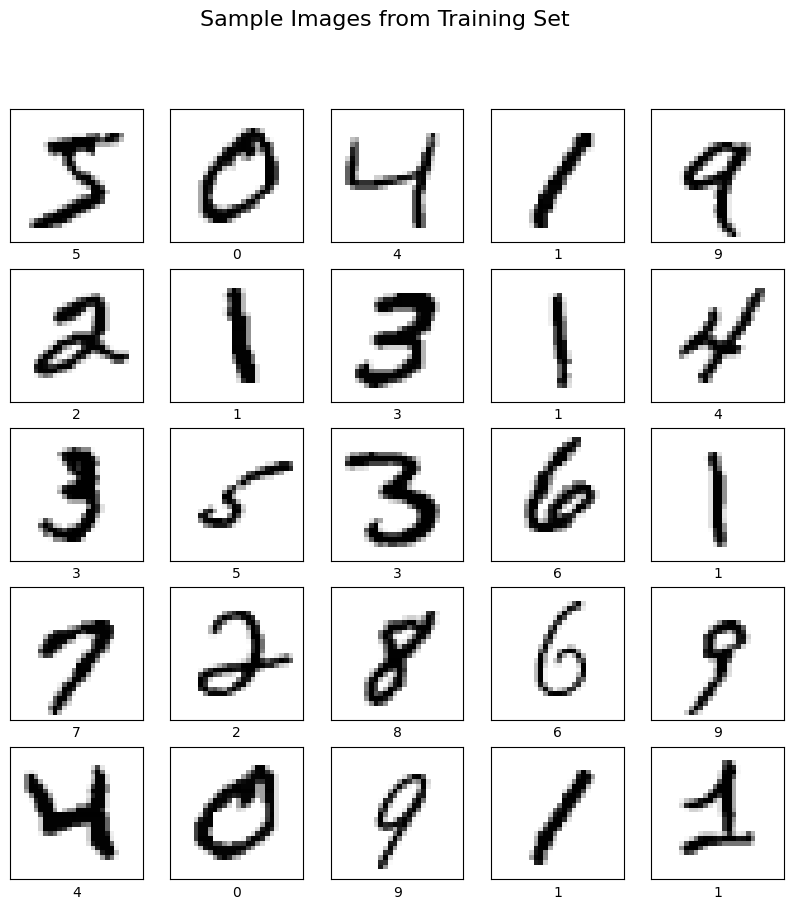

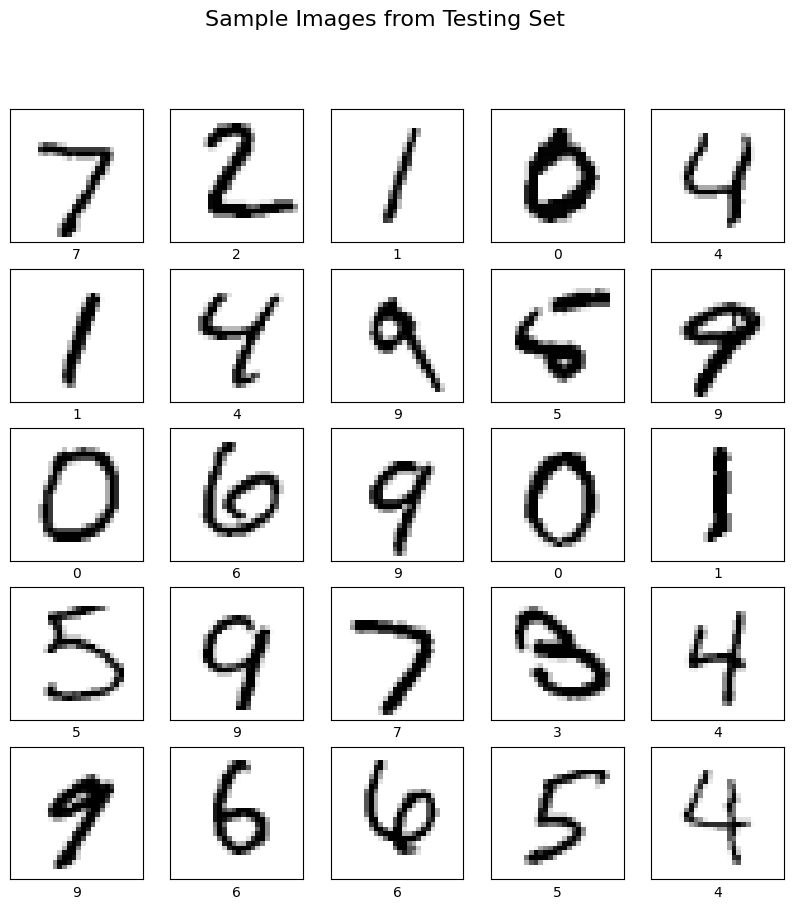

In [ ]:
# Display the number of samples in the training and testing sets
print(f"Number of samples in the training set: {len(x_train)}")
print(f"Number of samples in the testing set: {len(x_test)}")
print("")
# Display sample images from the training set with a title
plt.figure(figsize=(10, 10))
plt.suptitle("Sample Images from Training Set", fontsize=16)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))

plt.show()
print("")
# Display sample images from the testing set with a title
plt.figure(figsize=(10, 10))
plt.suptitle("Sample Images from Testing Set", fontsize=16)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_test[i]))

plt.show()

In [ ]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(x_train[..., np.newaxis], y_train, epochs=5, validation_data=(x_test[..., np.newaxis], y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test[..., np.newaxis], y_test, verbose=2)
print(f"Test accuracy: {test_accuracy}")
print(" ")
# Save the model
model.save("digit_recognition_model.h5")

313/313 - 3s - loss: 0.0368 - accuracy: 0.9891 - 3s/epoch - 9ms/step
Test accuracy: 0.9890999794006348
 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


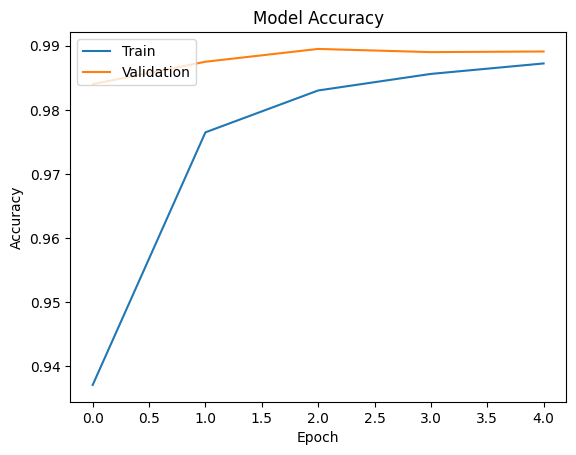

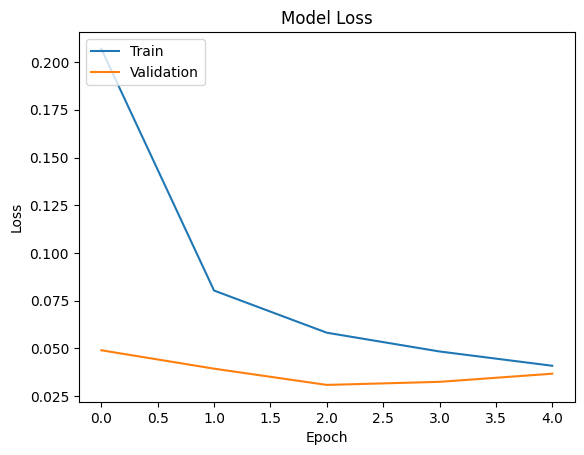

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
print(" ")
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the classification report
report = classification_report(y_test, predicted_labels)

# Print the classification report
print(report)


313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.97      1.00      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Recognizing A Random Digit**

In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np


# Load the trained model
model = load_model("digit_recognition_model.h5")

1/1 [==============================] - 0s 91ms/step


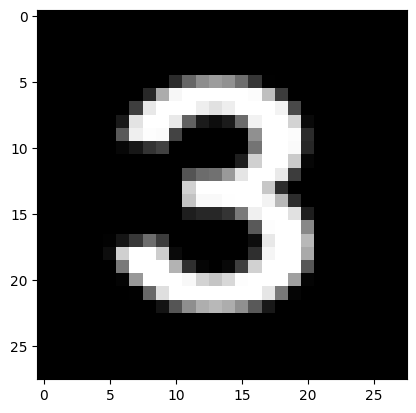

 
Predicted Digit: 3


In [ ]:
# Load and preprocess the image
image_path = "/content/Random Digit/3.png"
image = Image.open(image_path).convert("L")  # Convert to grayscale
image = image.resize((28, 28))  # Resize to 28x28 pixels
image = np.array(image) / 255.0  # Normalize pixel values
image = 1 - image  # Invert colors (if necessary)

# Make predictions on the preprocessed image
predictions = model.predict(image.reshape(1, 28, 28, 1))

# Get the predicted digit
predicted_digit = np.argmax(predictions)
import matplotlib.pyplot as plt

# Display the original image
plt.imshow(image, cmap='gray')
plt.show()
print(" ")
print(f"Predicted Digit: {predicted_digit}")

**This code is for local computer,not working on colab**

In [ ]:
import io
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("digit_recognition_model.h5")

# Create a canvas for drawing
canvas = widgets.Image(
    value=b'',  # Initialize with an empty bytes object
    format='png',
    width=200,
    height=200,
)

# Function to handle the drawing
def on_canvas_change(change):
    if change['new']:
        # Preprocess the image
        image_data = canvas.value
        if image_data:
            image = Image.open(io.BytesIO(image_data)).convert("L")  # Convert to grayscale
            image = np.array(image.resize((28, 28))) / 255.0  # Resize and normalize

            # Make a prediction
            prediction = model.predict(image.reshape(1, 28, 28, 1))
            predicted_digit = np.argmax(prediction)

            # Display the prediction
            plt.imshow(image, cmap='gray')
            plt.title(f"Predicted Digit: {predicted_digit}")
            plt.axis('off')
            plt.show()

# Observe the drawing for changes
canvas.observe(on_canvas_change, names='value')

# Create a clear button
clear_button = widgets.Button(description="Clear")
def clear_canvas(_):
    canvas.value = b''  # Clear the canvas
    clear_output(wait=True)
clear_button.on_click(clear_canvas)

# Display the widgets
display(canvas)
display(clear_button)

# Initialize the canvas
on_canvas_change({'new': canvas.value})

Image(value=b'', height='200', width='200')

Button(description='Clear', style=ButtonStyle())